In [1]:
from pycaret.classification import*

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

# Exploratory Data Analysis

In [3]:
data=pd.read_csv('Final_SolarData.csv')

In [4]:
data.head()

,location,date_time,solarvoltage,solarcurrent,solarenergy,solarpower,batteryvoltage,batterycurrent,batterypower,load_energy1,load_power1,load_current1,load_voltage1,load_energy2,load_power2,load_current2,load_voltage2,inverter_input_power,inverter_output_power,inverter_input_energy,inverter_output_energy,irradiance,temperature
0,Peru,2015-12-02 00:00:27,0.0,0.0,0.0,0.0,98.78,0.0,0.0,0.00,182.47,0.96,188.58,0.00,81.46,0.43,188.58,0.52,0.32,0.000,0.000,15,38.44
1,Peru,2015-12-02 00:01:40,0.0,0.0,0.0,0.0,98.80,0.0,0.0,0.01,192.18,1.01,188.51,0.01,71.66,0.38,188.51,0.52,0.32,0.007,0.000,0,38.44
2,Peru,2015-12-02 00:02:52,0.0,0.0,0.0,0.0,98.55,0.0,0.0,0.00,185.28,0.98,188.12,0.00,81.26,0.43,188.12,0.52,0.32,0.000,0.007,15,38.44
3,Peru,2015-12-02 00:04:05,0.0,0.0,0.0,0.0,98.64,0.0,0.0,0.00,175.68,0.93,188.29,0.00,87.84,0.46,188.29,0.66,0.45,0.021,0.007,0,38.44
4,Peru,2015-12-02 00:05:18,0.0,0.0,0.0,0.0,98.59,0.0,0.0,0.01,188.92,1.00,188.51,0.00,78.17,0.41,188.51,0.66,0.44,0.007,0.007,0,38.44


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119296 entries, 0 to 119295
Data columns (total 23 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   location                119296 non-null  object 
 1   date_time               119296 non-null  object 
 2   solarvoltage            119296 non-null  float64
 3   solarcurrent            119296 non-null  float64
 4   solarenergy             119296 non-null  float64
 5   solarpower              119296 non-null  float64
 6   batteryvoltage          119296 non-null  float64
 7   batterycurrent          119296 non-null  float64
 8   batterypower            119296 non-null  float64
 9   load_energy1            119296 non-null  float64
 10  load_power1             119296 non-null  float64
 11  load_current1           119296 non-null  float64
 12  load_voltage1           119296 non-null  float64
 13  load_energy2            119296 non-null  float64
 14  load_power2         

In [6]:
data.dtypes

location                   object
date_time                  object
solarvoltage              float64
solarcurrent              float64
solarenergy               float64
solarpower                float64
batteryvoltage            float64
batterycurrent            float64
batterypower              float64
load_energy1              float64
load_power1               float64
load_current1             float64
load_voltage1             float64
load_energy2              float64
load_power2               float64
load_current2             float64
load_voltage2             float64
inverter_input_power      float64
inverter_output_power     float64
inverter_input_energy     float64
inverter_output_energy    float64
irradiance                  int64
temperature               float64
dtype: object

In [7]:
data.shape


(119296, 23)

In [8]:
data.isnull().sum()

location                    0
date_time                   0
solarvoltage                0
solarcurrent                0
solarenergy                 0
solarpower                  0
batteryvoltage              0
batterycurrent              0
batterypower                0
load_energy1                0
load_power1                 0
load_current1               0
load_voltage1               0
load_energy2                0
load_power2                 0
load_current2               0
load_voltage2               0
inverter_input_power        0
inverter_output_power       0
inverter_input_energy       0
inverter_output_energy      0
irradiance                  0
temperature               176
dtype: int64

In [9]:
data.isnull().sum().sort_values(ascending=False)

temperature               176
load_voltage1               0
irradiance                  0
inverter_output_energy      0
inverter_input_energy       0
inverter_output_power       0
inverter_input_power        0
load_voltage2               0
load_current2               0
load_power2                 0
load_energy2                0
location                    0
date_time                   0
load_power1                 0
load_energy1                0
batterypower                0
batterycurrent              0
batteryvoltage              0
solarpower                  0
solarenergy                 0
solarcurrent                0
solarvoltage                0
load_current1               0
dtype: int64

In [10]:
missing_values= pd.isnull(data["temperature"]) 
missing_values

0         False
1         False
2         False
3         False
4         False
          ...  
119291    False
119292    False
119293    False
119294    False
119295    False
Name: temperature, Length: 119296, dtype: bool

In [11]:
data.dropna()

,location,date_time,solarvoltage,solarcurrent,solarenergy,solarpower,batteryvoltage,batterycurrent,batterypower,load_energy1,load_power1,load_current1,load_voltage1,load_energy2,load_power2,load_current2,load_voltage2,inverter_input_power,inverter_output_power,inverter_input_energy,inverter_output_energy,irradiance,temperature
0,Peru,2015-12-02 00:00:27,0.0,0.00,0.0,0.0,98.78,0.00,0.00,0.00,182.47,0.96,188.58,0.00,81.46,0.43,188.58,0.52,0.32,0.000,0.000,15,38.44
1,Peru,2015-12-02 00:01:40,0.0,0.00,0.0,0.0,98.80,0.00,0.00,0.01,192.18,1.01,188.51,0.01,71.66,0.38,188.51,0.52,0.32,0.007,0.000,0,38.44
2,Peru,2015-12-02 00:02:52,0.0,0.00,0.0,0.0,98.55,0.00,0.00,0.00,185.28,0.98,188.12,0.00,81.26,0.43,188.12,0.52,0.32,0.000,0.007,15,38.44
3,Peru,2015-12-02 00:04:05,0.0,0.00,0.0,0.0,98.64,0.00,0.00,0.00,175.68,0.93,188.29,0.00,87.84,0.46,188.29,0.66,0.45,0.021,0.007,0,38.44
4,Peru,2015-12-02 00:05:18,0.0,0.00,0.0,0.0,98.59,0.00,0.00,0.01,188.92,1.00,188.51,0.00,78.17,0.41,188.51,0.66,0.44,0.007,0.007,0,38.44
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119291,Peru,2016-03-14 22:22:02,0.0,1.11,0.0,0.0,94.88,1.50,142.87,0.00,124.63,0.65,189.82,0.01,68.87,0.36,189.82,0.57,0.38,0.014,0.007,15,39.12
119292,Peru,2016-03-14 22:23:14,0.0,1.11,0.0,0.0,94.58,0.47,44.50,0.01,114.46,0.60,189.26,0.00,58.86,0.31,189.26,0.56,0.39,0.007,0.007,0,38.94
119293,Peru,2016-03-14 22:24:27,0.0,1.23,0.0,0.0,93.97,0.28,26.53,0.00,131.01,0.69,189.56,0.00,65.50,0.34,189.56,0.56,0.38,0.007,0.000,0,38.94
119294,Peru,2016-03-14 22:25:40,0.0,1.17,0.0,0.0,94.41,1.19,112.54,0.00,121.10,0.63,189.43,0.00,62.19,0.32,189.43,0.57,0.38,0.014,0.007,0,38.94


In [12]:
columns_with_na_dropped = data.dropna(axis=1)
columns_with_na_dropped.head()

,location,date_time,solarvoltage,solarcurrent,solarenergy,solarpower,batteryvoltage,batterycurrent,batterypower,load_energy1,load_power1,load_current1,load_voltage1,load_energy2,load_power2,load_current2,load_voltage2,inverter_input_power,inverter_output_power,inverter_input_energy,inverter_output_energy,irradiance
0,Peru,2015-12-02 00:00:27,0.0,0.0,0.0,0.0,98.78,0.0,0.0,0.00,182.47,0.96,188.58,0.00,81.46,0.43,188.58,0.52,0.32,0.000,0.000,15
1,Peru,2015-12-02 00:01:40,0.0,0.0,0.0,0.0,98.80,0.0,0.0,0.01,192.18,1.01,188.51,0.01,71.66,0.38,188.51,0.52,0.32,0.007,0.000,0
2,Peru,2015-12-02 00:02:52,0.0,0.0,0.0,0.0,98.55,0.0,0.0,0.00,185.28,0.98,188.12,0.00,81.26,0.43,188.12,0.52,0.32,0.000,0.007,15
3,Peru,2015-12-02 00:04:05,0.0,0.0,0.0,0.0,98.64,0.0,0.0,0.00,175.68,0.93,188.29,0.00,87.84,0.46,188.29,0.66,0.45,0.021,0.007,0
4,Peru,2015-12-02 00:05:18,0.0,0.0,0.0,0.0,98.59,0.0,0.0,0.01,188.92,1.00,188.51,0.00,78.17,0.41,188.51,0.66,0.44,0.007,0.007,0


In [13]:
print("Columns in original dataset: %d \n" % data.shape[1])
print("Columns with na's dropped: %d" % columns_with_na_dropped.shape[1])

Columns in original dataset: 23 

Columns with na's dropped: 22


In [14]:
data['date_time'] = pd.to_datetime(data['date_time'])


In [15]:
data.dtypes

location                          object
date_time                 datetime64[ns]
solarvoltage                     float64
solarcurrent                     float64
solarenergy                      float64
solarpower                       float64
batteryvoltage                   float64
batterycurrent                   float64
batterypower                     float64
load_energy1                     float64
load_power1                      float64
load_current1                    float64
load_voltage1                    float64
load_energy2                     float64
load_power2                      float64
load_current2                    float64
load_voltage2                    float64
inverter_input_power             float64
inverter_output_power            float64
inverter_input_energy            float64
inverter_output_energy           float64
irradiance                         int64
temperature                      float64
dtype: object

In [16]:
data.columns

Index(['location', 'date_time', 'solarvoltage', 'solarcurrent', 'solarenergy',
       'solarpower', 'batteryvoltage', 'batterycurrent', 'batterypower',
       'load_energy1', 'load_power1', 'load_current1', 'load_voltage1',
       'load_energy2', 'load_power2', 'load_current2', 'load_voltage2',
       'inverter_input_power', 'inverter_output_power',
       'inverter_input_energy', 'inverter_output_energy', 'irradiance',
       'temperature'],
      dtype='object')

In [17]:
data.skew()

solarvoltage                0.169811
solarcurrent                1.085848
solarenergy                58.399654
solarpower                  0.879099
batteryvoltage             -0.542736
batterycurrent              1.119845
batterypower                1.151977
load_energy1              151.550088
load_power1                 1.113178
load_current1               1.148885
load_voltage1              -9.679776
load_energy2                5.504227
load_power2                 0.050937
load_current2               0.073336
load_voltage2              -9.679776
inverter_input_power        2.435407
inverter_output_power     235.642088
inverter_input_energy      48.835040
inverter_output_energy     21.545588
irradiance                  1.900642
temperature                 2.636329
dtype: float64

In [18]:
data.kurt()

solarvoltage                 -1.867285
solarcurrent                  0.343499
solarenergy                8778.367807
solarpower                   -0.640969
batteryvoltage               11.710920
batterycurrent                0.087627
batterypower                  0.196991
load_energy1              38758.832564
load_power1                   1.795199
load_current1                 1.867863
load_voltage1                99.725862
load_energy2                229.848240
load_power2                   0.011164
load_current2                 0.127850
load_voltage2                99.725862
inverter_input_power          8.011426
inverter_output_power     56855.173231
inverter_input_energy      6060.402081
inverter_output_energy     1439.582866
irradiance                    3.105551
temperature                  12.743482
dtype: float64

# Regregression

In [19]:
from pycaret.regression import * 
import pandas as pd

In [20]:
data.describe()

,solarvoltage,solarcurrent,solarenergy,solarpower,batteryvoltage,batterycurrent,batterypower,load_energy1,load_power1,load_current1,load_voltage1,load_energy2,load_power2,load_current2,load_voltage2,inverter_input_power,inverter_output_power,inverter_input_energy,inverter_output_energy,irradiance,temperature
count,119296.000000,119296.000000,119296.000000,119296.000000,119296.000000,119296.000000,119296.000000,119296.000000,119296.000000,119296.000000,119296.000000,119296.000000,119296.000000,119296.000000,119296.000000,119296.000000,119296.000000,119296.000000,119296.000000,119296.000000,119120.000000
mean,81.551298,3.123387,0.008706,508.336857,98.691006,4.170616,421.159804,0.002980,174.804158,0.930739,186.679366,0.001610,94.917555,0.504330,186.679366,0.293585,0.111630,0.004202,0.001568,312.958942,38.506775
std,85.631798,3.768051,0.018784,651.506325,2.883481,5.474155,557.349818,0.007705,60.718941,0.322839,5.547655,0.003834,25.500409,0.138037,5.547655,0.224464,1.467514,0.007349,0.004476,485.932112,0.436293
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,55.030000,0.290000,127.810000,0.000000,0.000000,0.130000,127.810000,0.000000,0.000000,0.000000,0.000000,0.000000,36.540000
25%,0.000000,0.000000,0.000000,0.000000,97.020000,0.000000,0.000000,0.000000,134.180000,0.700000,186.070000,0.000000,75.290000,0.410000,186.070000,0.190000,0.000000,0.000000,0.000000,0.000000,38.440000
50%,0.000000,1.170000,0.000000,0.000000,98.770000,0.970000,94.130000,0.000000,165.370000,0.880000,187.270000,0.000000,97.330000,0.510000,187.270000,0.190000,0.000000,0.000000,0.000000,30.000000,38.440000
75%,182.390000,6.300000,0.020000,1130.600000,100.530000,8.840000,885.865000,0.010000,204.617500,1.080000,188.060000,0.000000,113.060000,0.600000,188.060000,0.330000,0.120000,0.007000,0.000000,545.000000,38.440000
max,198.750000,18.350000,3.230000,2980.960000,112.070000,23.990000,2526.640000,2.010000,461.430000,2.480000,190.860000,0.270000,242.000000,1.330000,190.860000,2.320000,355.270000,1.162000,0.420000,1883.000000,45.540000


In [21]:
cat_f=['location', 'date_time', 'solarvoltage', 'solarcurrent', 'solarenergy',
       'solarpower', 'batteryvoltage', 'batterycurrent', 'batterypower',
       'load_energy1', 'load_power1', 'load_current1', 'load_voltage1',
       'load_energy2', 'load_power2', 'load_current2', 'load_voltage2',
       'inverter_input_power', 'inverter_output_power',
       'inverter_input_energy', 'inverter_output_energy', 'irradiance',
       'temperature']

In [22]:
data['temperature'].describe()

count    119120.000000
mean         38.506775
std           0.436293
min          36.540000
25%          38.440000
50%          38.440000
75%          38.440000
max          45.540000
Name: temperature, dtype: float64

In [23]:
traindata = data[0:100000]
testdata = data[100000:]
print('Data for Modeling: ' + str(traindata.shape))
print('Unseen Test Data For Predictions: ' + str(testdata.shape))

Data for Modeling: (100000, 23)
Unseen Test Data For Predictions: (19296, 23)


In [24]:
target = 'irradiance'
data = traindata

In [25]:
corr_matrix=data.corr()
corr_matrix["irradiance"].sort_values(ascending=False)

irradiance                1.000000
batterycurrent            0.616224
batterypower              0.613680
solarcurrent              0.608385
solarpower                0.573467
solarvoltage              0.444946
solarenergy               0.385098
inverter_input_power      0.253651
batteryvoltage            0.234874
inverter_output_power     0.218651
inverter_output_energy    0.155758
inverter_input_energy     0.086225
load_voltage2             0.084396
load_voltage1             0.084396
load_energy2             -0.032779
load_energy1             -0.064380
load_power1              -0.342297
load_power2              -0.344840
load_current1            -0.350428
load_current2            -0.350453
temperature                    NaN
Name: irradiance, dtype: float64

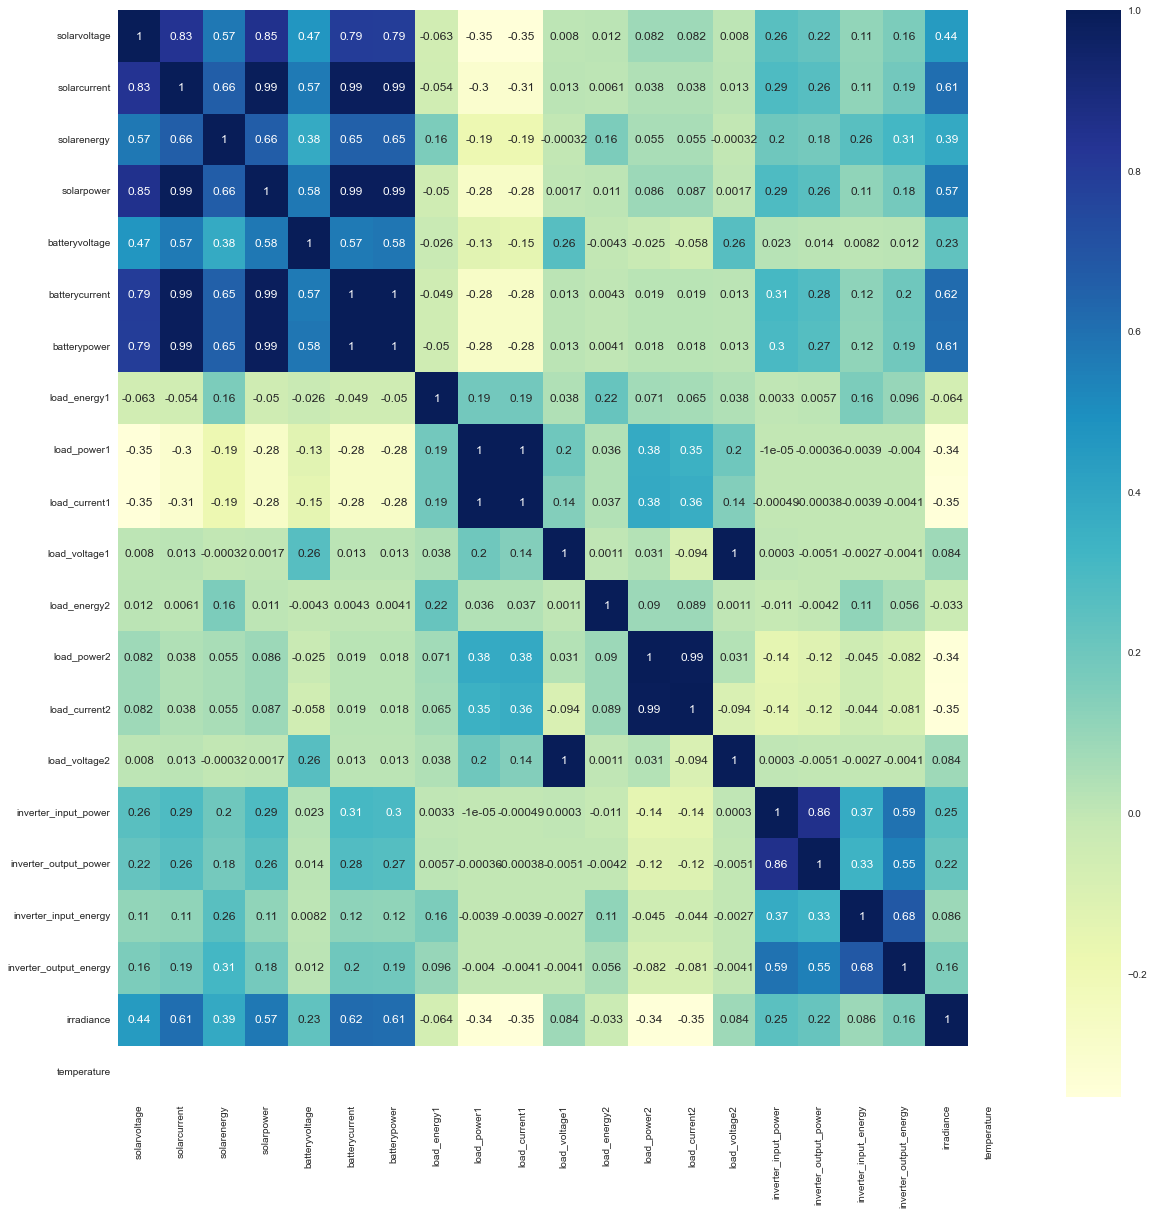

In [26]:

import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(20,20))         # Sample figsize in inches
dataplot = sns.heatmap(data.corr(), cmap="YlGnBu", annot=True)

In [27]:
from pycaret.regression import*
reg = setup(data=data,target='irradiance',session_id=123,train_size=0.80,
           ignore_features=['load_energy2','load_energy1','load_power1','load_power2','load_current1','load_current2','temperature'],
           normalize=True,
           transform_target = True,remove_outliers=True,
           remove_multicollinearity= True,
           combine_rare_levels=True,
            high_cardinality_features=['location'],
            log_experiment=True,experiment_name='life'
           )

,Description,Value
0,session_id,123
1,Target,irradiance
2,Original Data,"(100000, 23)"
3,Missing Values,False
4,Numeric Features,13
5,Categorical Features,1
6,Ordinal Features,False
7,High Cardinality Features,True
8,High Cardinality Method,frequency
9,Transformed Train Set,"(76000, 45)"


In [28]:
exp_clf = setup(data=data, target = target, feature_selection=True, session_id=100)

,Description,Value
0,session_id,100
1,Target,irradiance
2,Original Data,"(100000, 23)"
3,Missing Values,False
4,Numeric Features,20
5,Categorical Features,1
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(69999, 50)"


In [29]:
models()


,Name,Reference,Turbo
ID,,,
lr,Linear Regression,sklearn.linear_model._base.LinearRegression,True
lasso,Lasso Regression,sklearn.linear_model._coordinate_descent.Lasso,True
ridge,Ridge Regression,sklearn.linear_model._ridge.Ridge,True
en,Elastic Net,sklearn.linear_model._coordinate_descent.Elast...,True
lar,Least Angle Regression,sklearn.linear_model._least_angle.Lars,True
llar,Lasso Least Angle Regression,sklearn.linear_model._least_angle.LassoLars,True
omp,Orthogonal Matching Pursuit,sklearn.linear_model._omp.OrthogonalMatchingPu...,True
br,Bayesian Ridge,sklearn.linear_model._bayes.BayesianRidge,True
ard,Automatic Relevance Determination,sklearn.linear_model._bayes.ARDRegression,False


In [30]:
best=compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,26.6548,2948.6166,53.9859,0.9866,1.3599,0.2936,33.1970
rf,Random Forest Regressor,28.2483,3931.7792,62.4063,0.9822,1.3607,0.2958,36.3570
lightgbm,Light Gradient Boosting Machine,32.8953,4688.6018,68.2727,0.9788,1.3793,0.3401,0.3600
dt,Decision Tree Regressor,36.9204,8092.8985,89.5469,0.9633,1.5765,0.4221,1.9350
gbr,Gradient Boosting Regressor,57.5751,16019.1460,126.4891,0.9274,1.5019,0.6441,8.2970
ada,AdaBoost Regressor,104.8898,41529.3795,203.7687,0.8115,1.8563,1.0281,5.4410
knn,K Neighbors Regressor,85.3995,44372.0735,210.5934,0.7988,1.4614,0.6989,11.6910
br,Bayesian Ridge,184.7286,84977.6860,291.4726,0.6147,2.7075,3.0617,0.8220
ridge,Ridge Regression,184.4190,85277.7863,291.9856,0.6133,2.6991,3.0434,0.3160
lr,Linear Regression,183.9752,85278.4413,291.9864,0.6133,2.7023,3.0314,10.9560


In [31]:
par = create_model('par')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,514.6130,524456.3100,724.1936,-1.3248,2.7444,4.4240
1,345.0681,206719.1784,454.6638,0.0680,3.0776,4.6494
2,250.3099,130066.2587,360.6470,0.3956,2.9542,4.5294
3,350.8714,230263.9748,479.8583,0.0341,2.7159,4.2097
4,686.5742,1115570.8366,1056.2059,-3.9879,2.8738,5.1397
5,830.0463,1482158.2902,1217.4392,-5.8601,2.8747,6.6104
6,843.0010,1522174.7916,1233.7645,-6.0245,2.8514,6.7425
7,792.0349,1271424.8527,1127.5748,-5.0559,2.9084,6.8975
8,786.9194,1243917.0838,1115.3103,-4.8212,2.8985,6.8820
9,239.5067,133441.0406,365.2958,0.4062,2.7222,3.4896


In [101]:
gbr = create_model('gbr')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000
1,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000
2,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000
3,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000
4,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000
5,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000
6,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000
7,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000
8,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000
9,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000


In [105]:
tuned_gbr = tune_model(gbr)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000
1,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000
2,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000
3,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000
4,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000
5,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000
6,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000
7,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000
8,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000
9,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000


In [32]:
tuned_par = tune_model(par)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,304.6009,187464.1668,432.9713,0.1690,2.9479,3.5383
1,290.5549,170707.5036,413.1676,0.2303,2.9012,3.5134
2,296.2495,176744.3004,420.4097,0.1787,2.9169,3.5773
3,300.3711,184247.1895,429.2402,0.2271,2.9190,3.4642
4,298.7297,178657.7549,422.6793,0.2012,2.9274,3.5977
5,288.1370,168807.8217,410.8623,0.2187,2.9586,3.4228
6,294.6856,173826.1599,416.9246,0.1978,2.9264,3.6928
7,290.5770,168183.1439,410.1014,0.1989,2.9270,3.6297
8,300.8704,178597.1336,422.6075,0.1642,2.9526,3.5828
9,606.9557,451449.2030,671.8997,-1.0088,3.9986,13.4043


In [33]:
print(tuned_par)


PassiveAggressiveRegressor(C=0.911, average=False, early_stopping=False,
                           epsilon=0.3, fit_intercept=False,
                           loss='squared_epsilon_insensitive', max_iter=1000,
                           n_iter_no_change=5, random_state=100, shuffle=False,
                           tol=0.001, validation_fraction=0.1, verbose=0,
                           warm_start=False)


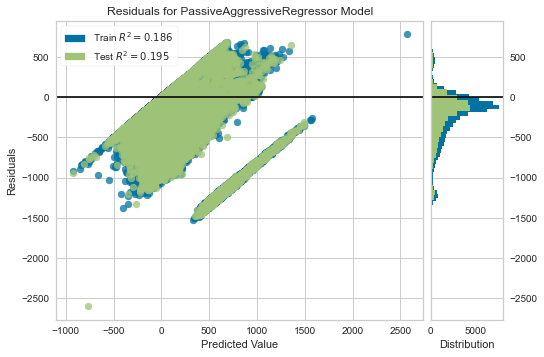

In [34]:
plot_model(tuned_par)


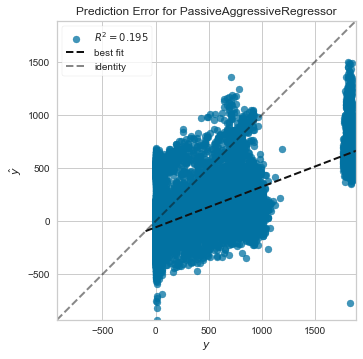

In [35]:
plot_model(tuned_par, plot = 'error')

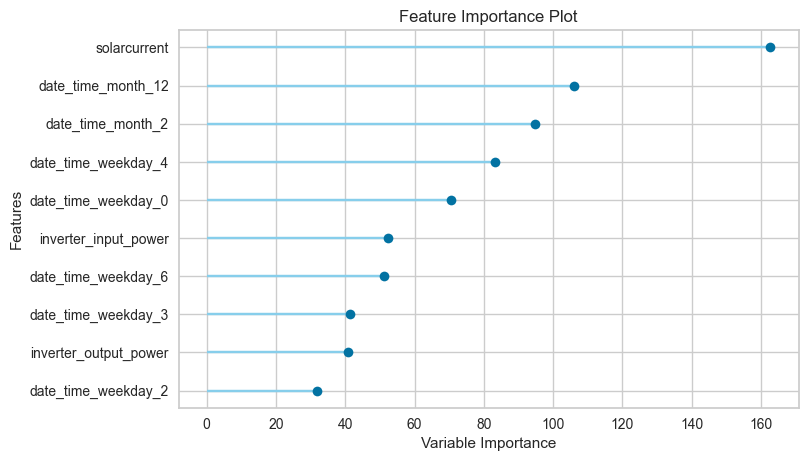

In [36]:
plot_model(tuned_par, plot = 'feature')

In [37]:
evaluate_model(tuned_par)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [38]:
predict_model(tuned_par)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Passive Aggressive Regressor,296.5226,176686.1359,420.3405,0.1954,2.9547,3.5948


,load_current2,solarenergy,date_time_hour_21,date_time_hour_6,load_energy2,load_power2,date_time_hour_19,date_time_hour_8,date_time_hour_9,load_energy1,...,load_current1,date_time_hour_14,date_time_hour_15,batteryvoltage,inverter_input_power,date_time_weekday_6,date_time_hour_0,date_time_hour_18,irradiance,Label
0,0.58,0.03,0.0,0.0,0.01,108.910004,0.0,0.0,0.0,0.00,...,0.76,0.0,0.0,105.849998,0.20,0.0,0.0,0.0,930,-57.849471
1,0.55,0.00,0.0,0.0,0.00,103.709999,0.0,0.0,0.0,0.00,...,0.98,0.0,0.0,100.070000,0.29,0.0,0.0,1.0,45,-161.798587
2,0.53,0.00,0.0,0.0,0.00,100.750000,0.0,0.0,0.0,0.00,...,1.17,0.0,0.0,99.379997,0.19,1.0,0.0,0.0,15,-232.231633
3,0.62,0.00,0.0,0.0,0.00,116.190002,0.0,0.0,0.0,0.00,...,2.31,0.0,0.0,93.419998,0.18,1.0,0.0,0.0,0,-144.850875
4,0.50,0.00,0.0,0.0,0.00,93.019997,0.0,0.0,0.0,0.00,...,0.76,0.0,0.0,100.059998,0.20,0.0,0.0,0.0,815,247.637599
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,0.69,0.02,0.0,0.0,0.01,127.379997,0.0,0.0,0.0,0.01,...,0.81,0.0,0.0,99.349998,0.19,0.0,0.0,0.0,125,-77.081246
29997,0.67,0.00,0.0,0.0,0.00,125.760002,0.0,0.0,0.0,0.00,...,1.14,0.0,0.0,96.339996,0.19,0.0,0.0,0.0,15,-89.908268
29998,0.50,0.00,0.0,0.0,0.01,92.790001,0.0,0.0,0.0,0.00,...,0.69,0.0,0.0,92.720001,0.41,0.0,0.0,0.0,15,-62.723250
29999,0.29,0.00,0.0,0.0,0.00,55.660000,0.0,0.0,0.0,0.00,...,0.63,0.0,0.0,94.169998,0.18,0.0,1.0,0.0,1832,587.353067


In [39]:
final_par = finalize_model(tuned_par)
print(final_par)

PassiveAggressiveRegressor(C=0.911, average=False, early_stopping=False,
                           epsilon=0.3, fit_intercept=False,
                           loss='squared_epsilon_insensitive', max_iter=1000,
                           n_iter_no_change=5, random_state=100, shuffle=False,
                           tol=0.001, validation_fraction=0.1, verbose=0,
                           warm_start=False)


In [40]:
unseen_predictions = predict_model(final_par, data=testdata)
unseen_predictions.head()

,location,date_time,solarvoltage,solarcurrent,solarenergy,solarpower,batteryvoltage,batterycurrent,batterypower,load_energy1,...,load_power2,load_current2,load_voltage2,inverter_input_power,inverter_output_power,inverter_input_energy,inverter_output_energy,irradiance,temperature,Label
100000,Peru,2016-02-27 06:50:35,0.0,1.42,0.0,0.0,93.42,1.06,99.63,0.0,...,48.65,0.25,187.73,0.18,0.0,0.007,0.0,1857,38.44,1858.282129
100001,Peru,2016-02-27 06:51:48,0.0,1.35,0.0,0.0,93.57,0.56,52.83,0.0,...,64.76,0.34,187.40,0.18,0.0,0.000,0.0,1857,38.44,1864.296752
100002,Peru,2016-02-27 06:53:01,0.0,1.48,0.0,0.0,93.48,1.63,152.49,0.0,...,64.80,0.34,187.53,0.18,0.0,0.000,0.0,1857,38.44,1865.286690
100003,Peru,2016-02-27 06:54:14,0.0,1.35,0.0,0.0,93.51,1.69,158.41,0.0,...,58.40,0.31,187.80,0.18,0.0,0.007,0.0,1864,38.44,1864.283277
100004,Peru,2016-02-27 06:55:26,0.0,1.42,0.0,0.0,93.45,1.69,158.30,0.0,...,61.55,0.32,187.50,0.18,0.0,0.000,0.0,1864,38.44,1863.306489


In [122]:
save_model(final_par,'Final PAR Model 8jan2022')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[], ml_usecase='regression',
                                       numerical_features=[],
                                       target='temperature', time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_stra...
                 ('fix_multi', 'passthrough'), ('dfs', 'passthrough'),
                 ('pca', 'passthrough'),
                 ['trained_model',
                  PassiveAggressiveRegressor(C=5.654, average=False,
                                             early_stopping=False, epsilon=0.3,
                 

In [ ]:
import voila
